## Breast Cancer Recurrence Prediction

In [ ]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# load dataset
df = pd.read_excel('/content/Clinical_and_Other_Features.xlsx')

In [ ]:
df.head()


,Date of Birth (Days),Menopause (at diagnosis),Race and Ethnicity,Metastatic at Presentation (Outside of Lymph Nodes),ER,PR,HER2,Mol Subtype,Oncotype score,Staging(Tumor Size)# [T],...,Therapeutic or Prophylactic Oophorectomy as part of Endocrine Therapy,Neoadjuvant Anti-Her2 Neu Therapy,Adjuvant Anti-Her2 Neu Therapy,Received Neoadjuvant Therapy or Not,Pathologic response to Neoadjuvant therapy: Pathologic stage (T) following neoadjuvant therapy,Pathologic response to Neoadjuvant therapy: Pathologic stage (N) following neoadjuvant therapy,Pathologic response to Neoadjuvant therapy: Pathologic stage (M) following neoadjuvant therapy,Overall Near-complete Response: Stricter Definition,Overall Near-complete Response: Looser Definition,Near-complete Response (Graded Measure)
0,-15209,0,2,0,0,0,1,2,NaN,2.0,...,1,1.0,1.0,1.0,1.0,-1.0,-1.0,0.0,0.0,0.0
1,-14061,0,2,0,0,0,0,3,NaN,2.0,...,0,0.0,0.0,1.0,NaN,NaN,NaN,2.0,2.0,4.0
2,-22685,1,1,0,1,1,0,0,8.0,2.0,...,0,0.0,0.0,1.0,1.0,1.0,-1.0,0.0,0.0,0.0
3,-21479,1,1,0,1,1,0,0,14.0,1.0,...,0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,-13932,0,5,0,1,0,1,1,NaN,2.0,...,0,1.0,1.0,1.0,0.0,0.0,-1.0,1.0,1.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 79 columns):
 #   Column                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                --------------  -----  
 0   Date of Birth (Days)                                                                                                                                                  922 non-null    int64  
 1   Menopause (at diagnosis)                                                                                                                                              922 non-null    int64  
 2   Race and Ethnicity                                                                                            

#  Data Preprocessing

In [ ]:
#df.isna().sum()

In [ ]:
#df = df.dropna(axis=1)

In [ ]:
df.columns = [c.replace(' ', '_') for c in df.columns]


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 922 entries, 0 to 921
Data columns (total 79 columns):
 #   Column                                                                                                                                                                Non-Null Count  Dtype  
---  ------                                                                                                                                                                --------------  -----  
 0   Date_of_Birth_(Days)                                                                                                                                                  922 non-null    int64  
 1   Menopause_(at_diagnosis)                                                                                                                                              922 non-null    int64  
 2   Race_and_Ethnicity                                                                                            

In [ ]:
df['Recurrence_event'].value_counts()

0.0    833
1.0     87
Name: Recurrence_event, dtype: int64

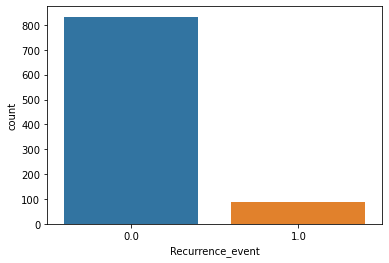

In [ ]:
sns.countplot(df['Recurrence_event'], label = 'count')

In [ ]:
df.dtypes

Date_of_Birth_(Days)                                                                                  int64
Menopause_(at_diagnosis)                                                                              int64
Race_and_Ethnicity                                                                                    int64
Metastatic_at_Presentation_(Outside_of_Lymph_Nodes)                                                   int64
ER                                                                                                    int64
                                                                                                     ...   
Pathologic_response_to_Neoadjuvant_therapy:__Pathologic_stage_(N)_following_neoadjuvant_therapy     float64
Pathologic_response_to_Neoadjuvant_therapy:__Pathologic_stage_(M)_following_neoadjuvant_therapy_    float64
Overall_Near-complete_Response:__Stricter_Definition                                                float64
Overall_Near-complete_Respon

In [ ]:
# encoding Categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df.iloc[:,1] = le.fit_transform(df.iloc[:,1].values)

In [ ]:
df

,Date_of_Birth_(Days),Menopause_(at_diagnosis),Race_and_Ethnicity,Metastatic_at_Presentation_(Outside_of_Lymph_Nodes),ER,PR,HER2,Mol_Subtype,Oncotype_score,Staging(Tumor_Size)#_[T],...,Therapeutic_or_Prophylactic_Oophorectomy_as_part_of_Endocrine_Therapy_,Neoadjuvant_Anti-Her2_Neu_Therapy,Adjuvant_Anti-Her2_Neu_Therapy_,Received_Neoadjuvant_Therapy_or_Not,Pathologic_response_to_Neoadjuvant_therapy:_Pathologic_stage_(T)_following_neoadjuvant_therapy_,Pathologic_response_to_Neoadjuvant_therapy:__Pathologic_stage_(N)_following_neoadjuvant_therapy,Pathologic_response_to_Neoadjuvant_therapy:__Pathologic_stage_(M)_following_neoadjuvant_therapy_,Overall_Near-complete_Response:__Stricter_Definition,Overall_Near-complete_Response:__Looser_Definition,Near-complete_Response_(Graded_Measure)
0,-15209,0,2,0,0,0,1,2,NaN,2.0,...,1,1.0,1.0,1.0,1.0,-1.0,-1.0,0.0,0.0,0.0
1,-14061,0,2,0,0,0,0,3,NaN,2.0,...,0,0.0,0.0,1.0,NaN,NaN,NaN,2.0,2.0,4.0
2,-22685,1,1,0,1,1,0,0,8.0,2.0,...,0,0.0,0.0,1.0,1.0,1.0,-1.0,0.0,0.0,0.0
3,-21479,1,1,0,1,1,0,0,14.0,1.0,...,0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
4,-13932,0,5,0,1,0,1,1,NaN,2.0,...,0,1.0,1.0,1.0,0.0,0.0,-1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,-24183,1,2,0,1,1,0,0,NaN,2.0,...,0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
918,-27677,1,1,0,1,1,0,0,22.0,1.0,...,0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
919,-22792,1,1,0,1,1,0,0,9.0,1.0,...,0,0.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
920,-14884,0,2,0,1,1,0,0,NaN,2.0,...,0,0.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


### Separate columns into smaller dataframes to perform visualization

In [ ]:
data_mean=df.iloc[:,1:11]

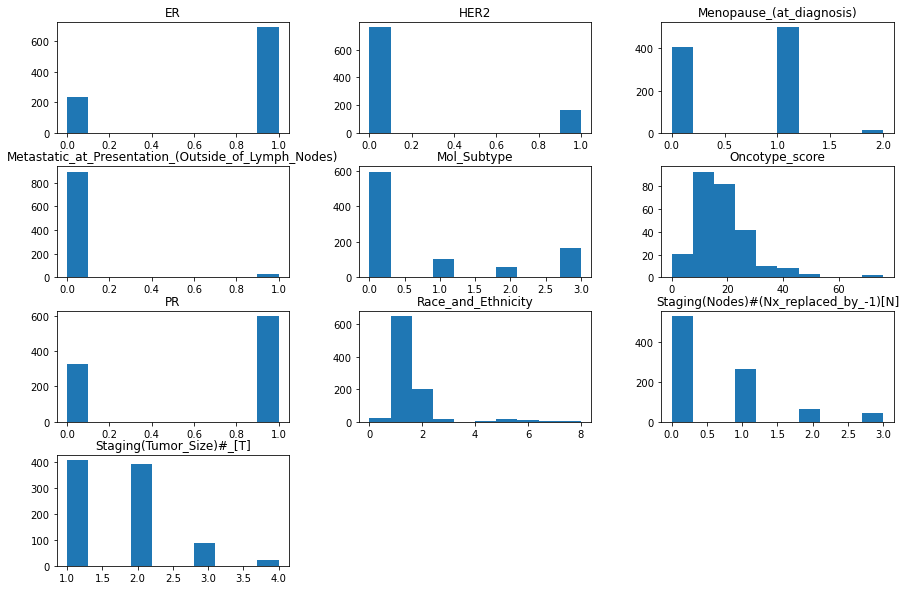

In [ ]:
#Plot histograms of CUT1 variables
hist_mean=data_mean.hist(bins=10, figsize=(15, 10),grid=False,)

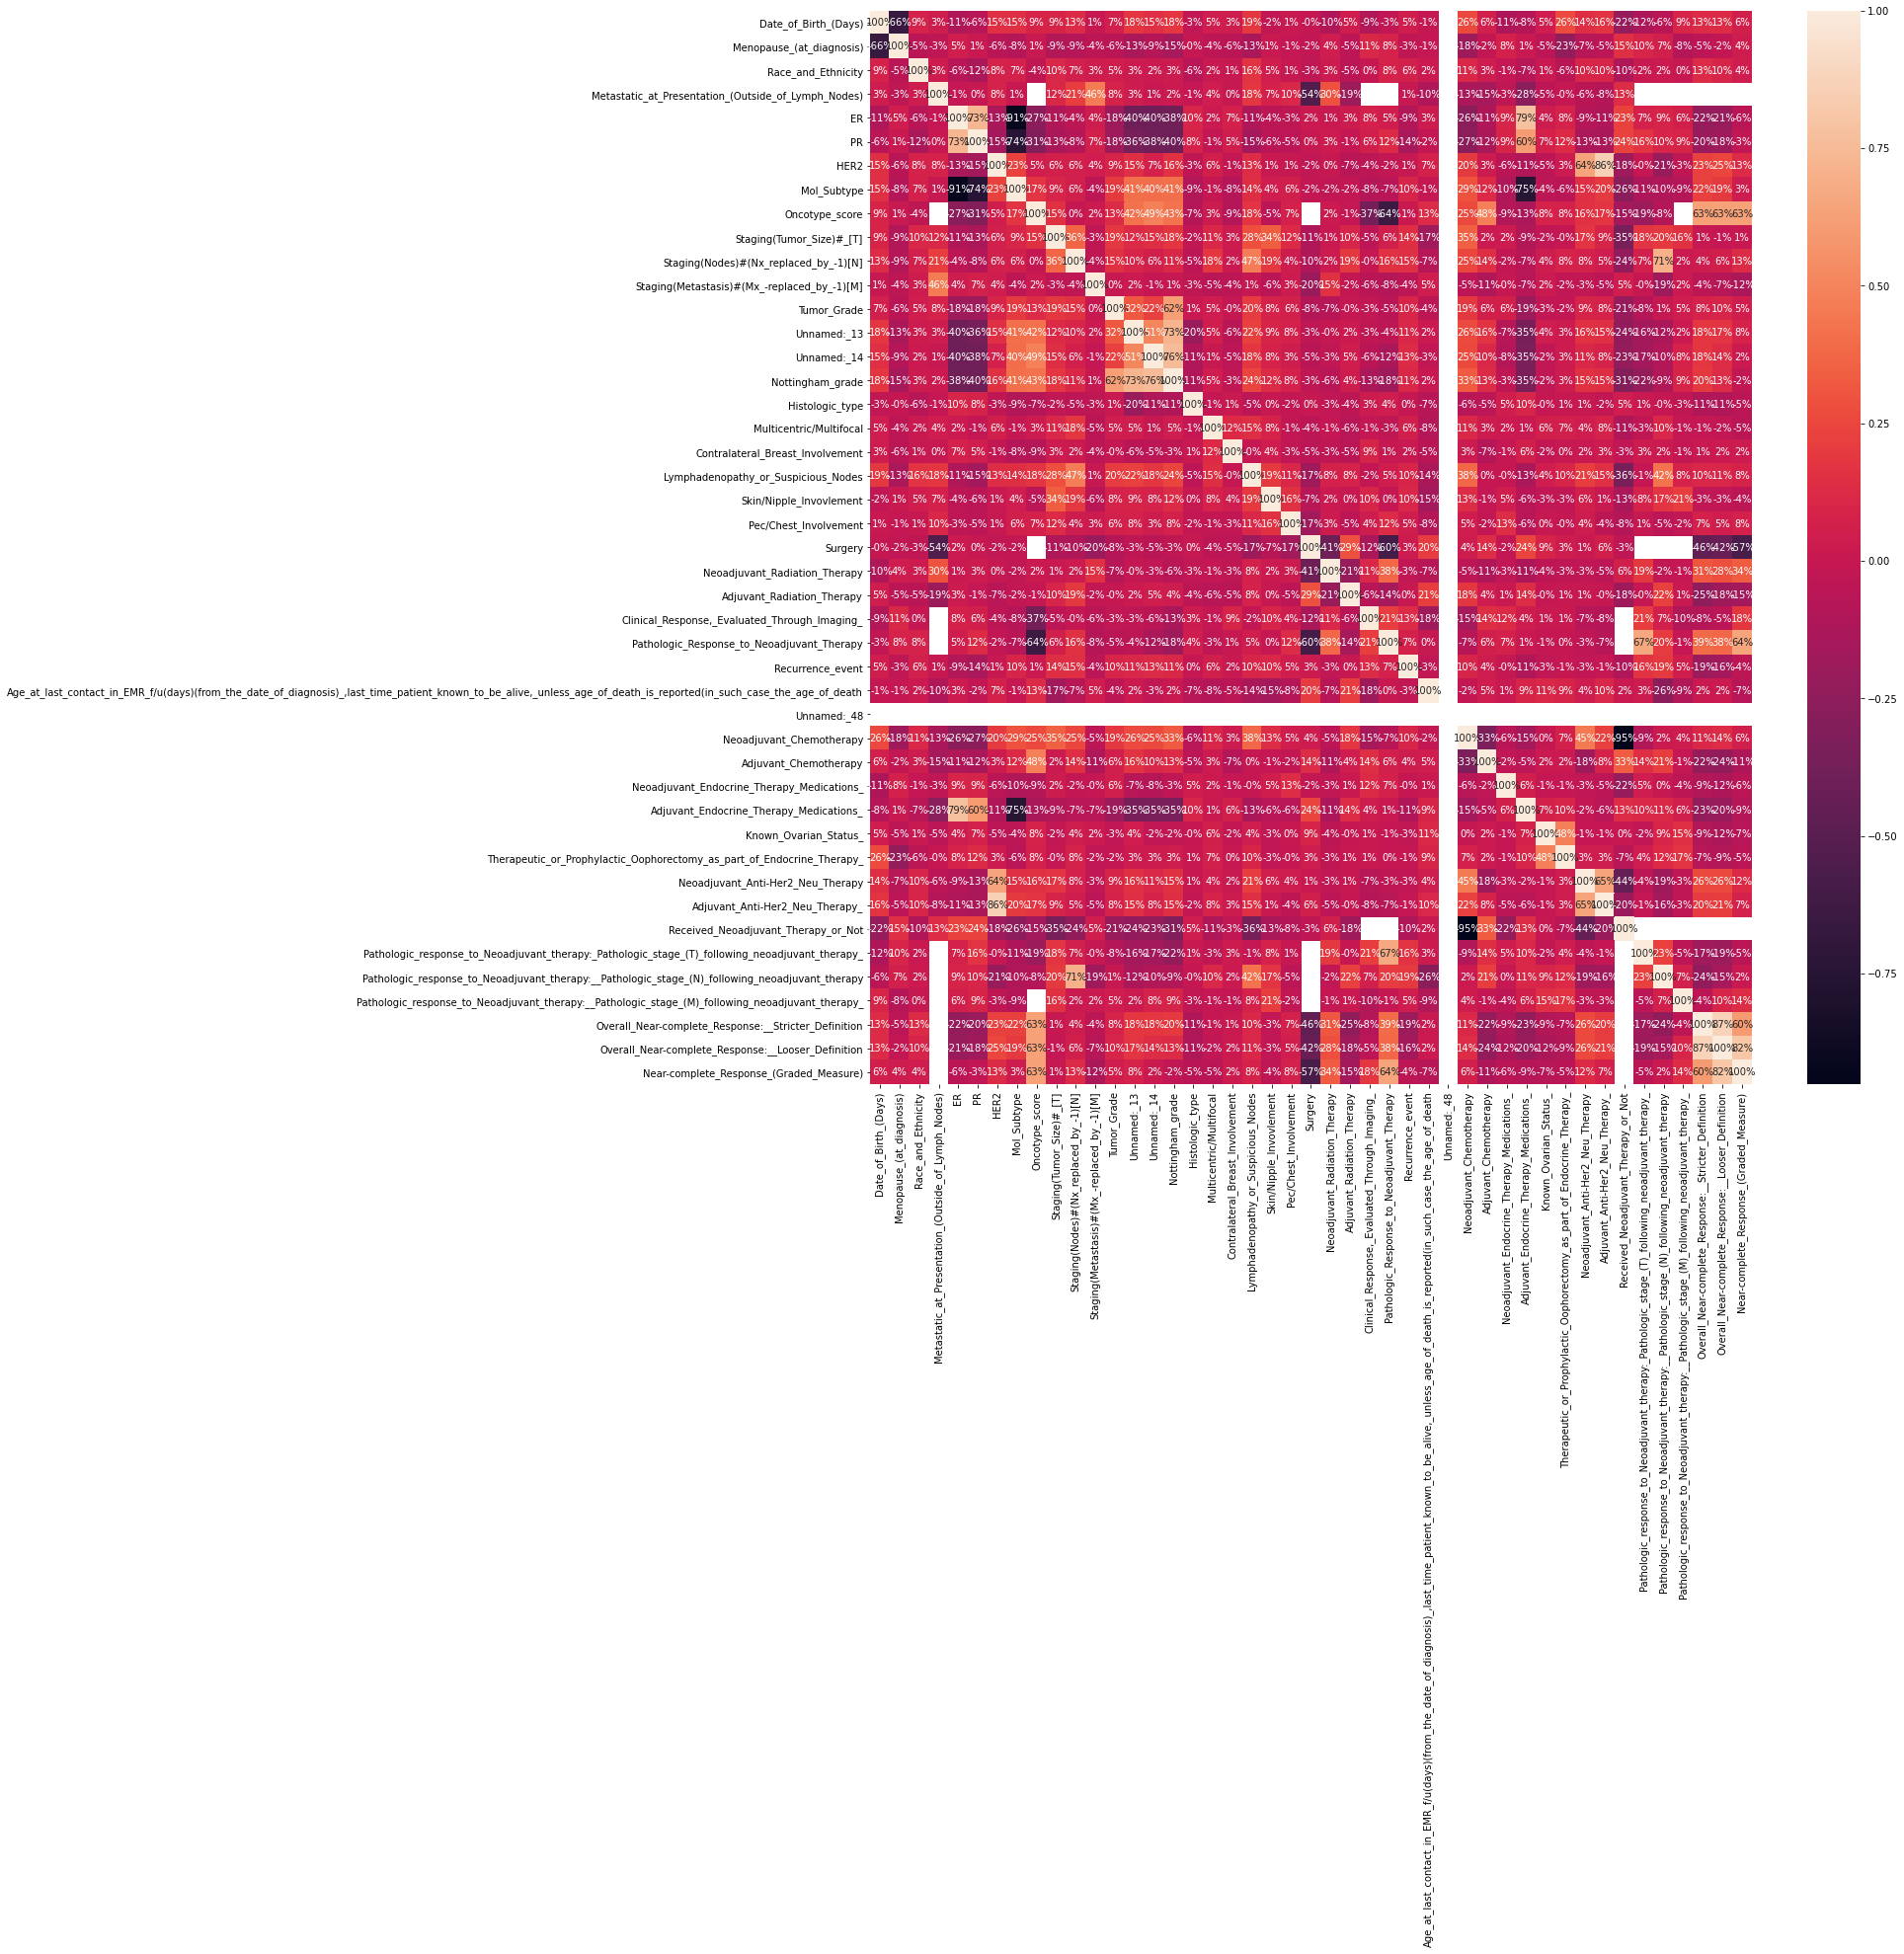

In [ ]:
#Heatmap
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True, fmt = '.0%')

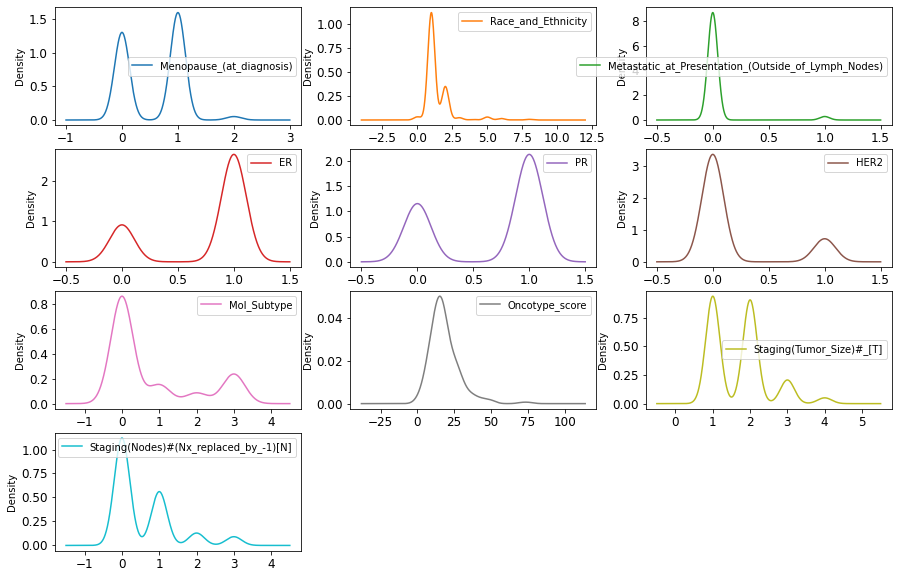

In [ ]:
#Density Plots
plt = data_mean.plot(kind= 'density', subplots=True, layout=(4,3), sharex=False,
                     sharey=False,fontsize=12, figsize=(15,10))

# Spliting the Data

In [ ]:
# train test split
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.get_dummies(df)

In [ ]:
#x = df.drop(['Recurrence_event'], axis=1)
#y = df['Recurrence_event'].values

In [ ]:
#x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

*## Feature Scaling*

In [ ]:
df=df.replace(np.nan,0)

In [ ]:
df = df.abs()


In [ ]:
df = df[np.isfinite(df).all(1)]


In [ ]:
print(np.any(np.isnan(x_train)))
print(np.all(np.isfinite(x_train)))

True
False


In [ ]:
df


,Date_of_Birth_(Days),Menopause_(at_diagnosis),Race_and_Ethnicity,Metastatic_at_Presentation_(Outside_of_Lymph_Nodes),ER,PR,HER2,Mol_Subtype,Oncotype_score,Staging(Tumor_Size)#_[T],...,Solid_NC,Posterior_acoustic_shadowing_0,Posterior_acoustic_shadowing_1,Posterior_acoustic_shadowing_1 [1],Posterior_acoustic_shadowing_NC,Posterior_acoustic_shadowing_[1],Number_of_Ovaries_In_Situ_\n_0,Number_of_Ovaries_In_Situ_\n_1,Number_of_Ovaries_In_Situ_\n_2,Number_of_Ovaries_In_Situ_\n_NP
0,15209.0,0.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,14061.0,0.0,2.0,0.0,0.0,0.0,0.0,3.0,0.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,22685.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,8.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,21479.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,14.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,13932.0,0.0,5.0,0.0,1.0,0.0,1.0,1.0,0.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
917,24183.0,1.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
918,27677.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,22.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
919,22792.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,9.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
920,14884.0,0.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
x = df.drop(['Recurrence_event'], axis=1)
y = df['Recurrence_event'].values

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

In [ ]:
print(np.any(np.isnan(x_train)))
print(np.all(np.isfinite(x_train)))

False
True


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Model Building

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state= 0 )
classifier.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression()
reg.fit(x_train,y_train)
print("Logistic Regression accuracy : {:.2f}%".format(reg.score(x_test,y_test)*100))

Logistic Regression accuracy : 89.73%


In [ ]:
# Support Vactor
from sklearn.svm import SVC
svm = SVC(random_state=10)
svm1 = SVC(kernel='linear',gamma='scale',random_state=10)
svm2 = SVC(kernel='rbf',gamma='scale',random_state=10)
svm3 = SVC(kernel='poly',gamma='scale',random_state=10)
svm4 = SVC(kernel='sigmoid',gamma='scale',random_state=10)

svm.fit(x_train,y_train)
svm1.fit(x_train,y_train)
svm2.fit(x_train,y_train)
svm3.fit(x_train,y_train)
svm4.fit(x_train,y_train)

print('SVC Accuracy : {:,.2f}%'.format(svm.score(x_test,y_test)*100))

print('SVC Liner Accuracy : {:,.2f}%'.format(svm1.score(x_test,y_test)*100))

print('SVC RBF Accuracy : {:,.2f}%'.format(svm2.score(x_test,y_test)*100))

print('SVC Ploy Accuracy : {:,.2f}%'.format(svm3.score(x_test,y_test)*100))

print('SVC Sigmoid Accuracy : {:,.2f}%'.format(svm4.score(x_test,y_test)*100))




SVC Accuracy : 89.73%
SVC Liner Accuracy : 89.19%
SVC RBF Accuracy : 89.73%
SVC Ploy Accuracy : 89.73%
SVC Sigmoid Accuracy : 89.19%


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train,y_train)
print(" Naive Bayes accuracy : {:.2f}%".format(nb.score(x_test,y_test)*100))

 Naive Bayes accuracy : 73.51%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=1000,random_state=1)
rf.fit(x_train,y_train)
print("Random Forest Classifier accuracy : {:.2f}%".format(rf.score(x_test,y_test)*100))

Random Forest Classifier accuracy : 89.19%


In [ ]:
import xgboost
xg = xgboost.XGBClassifier()
xg.fit(x_train,y_train)
print("XGboost accuracy : {:.2f}%".format(xg.score(x_test,y_test)*100))

XGboost accuracy : 98.38%


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(x_train,y_train)
print('KNN Accuracy {:.2f}%'.format(knn.score(x_test,y_test)*100))

KNN Accuracy 89.73%


In [ ]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion='entropy',max_depth=4, random_state=10)
dt.fit(x_train,y_train)
print("Decision Tree Accuracy : {:,.2f}%".format(dt.score(x_test,y_test)*100))

Decision Tree Accuracy : 98.38%
